In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Data/Real_Data/Real_Combine.csv")
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,22.2,28.4,16.6,-,53,7.7,0.9,5.4,1.000000
1,22.2,28.4,16.6,-,53,7.7,0.9,5.4,1.000000
2,22.1,28.9,17.8,-,58,5.1,1.1,-,217.083333
3,22.1,28.9,17.8,-,58,5.1,1.1,-,217.083333
4,22.1,28.9,17.8,-,58,5.1,1.1,-,217.083333


# About Dataset:
*T Average Temperature (°C)

*TM Maximum temperature (°C) 

*Tm Minimum temperature (°C)

*SLP Atmospheric pressure at sea level (hPa) 

*H Average relative humidity (%) 

*VV Average visibility (Km)

*V Average wind speed (Km/h)

*VM Maximum sustained wind speed (Km/h)

*PM2.5 Atmospheric Particulate Matter(Independent variable)

As we are not getting data about SLP (Atmospheric pressure at sea level) remove that feature 

In [3]:
df.drop('SLP',inplace=True,axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       3306 non-null   float64
 1   TM      3306 non-null   float64
 2   Tm      3306 non-null   float64
 3   H       3306 non-null   int64  
 4   VV      3306 non-null   float64
 5   V       3306 non-null   float64
 6   VM      3306 non-null   object 
 7   PM2.5   3288 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 206.8+ KB


We have to deal with NaN values and 'VM' feature which is having numerical values but showing object type.

In [5]:
df.shape

(3306, 8)

In [6]:
df.isna().sum()

T         0
TM        0
Tm        0
H         0
VV        0
V         0
VM        0
PM2.5    18
dtype: int64

As we have enough data so we can drop NaN values

In [7]:
df.dropna(inplace = True)

In [8]:
df['VM'].replace({"-":0},inplace=True)

In [9]:
#Converting 'VM' Object type to catagorical
df["VM"]=pd.to_numeric(df.VM)

Drowing Pair plot to check linear relationship 

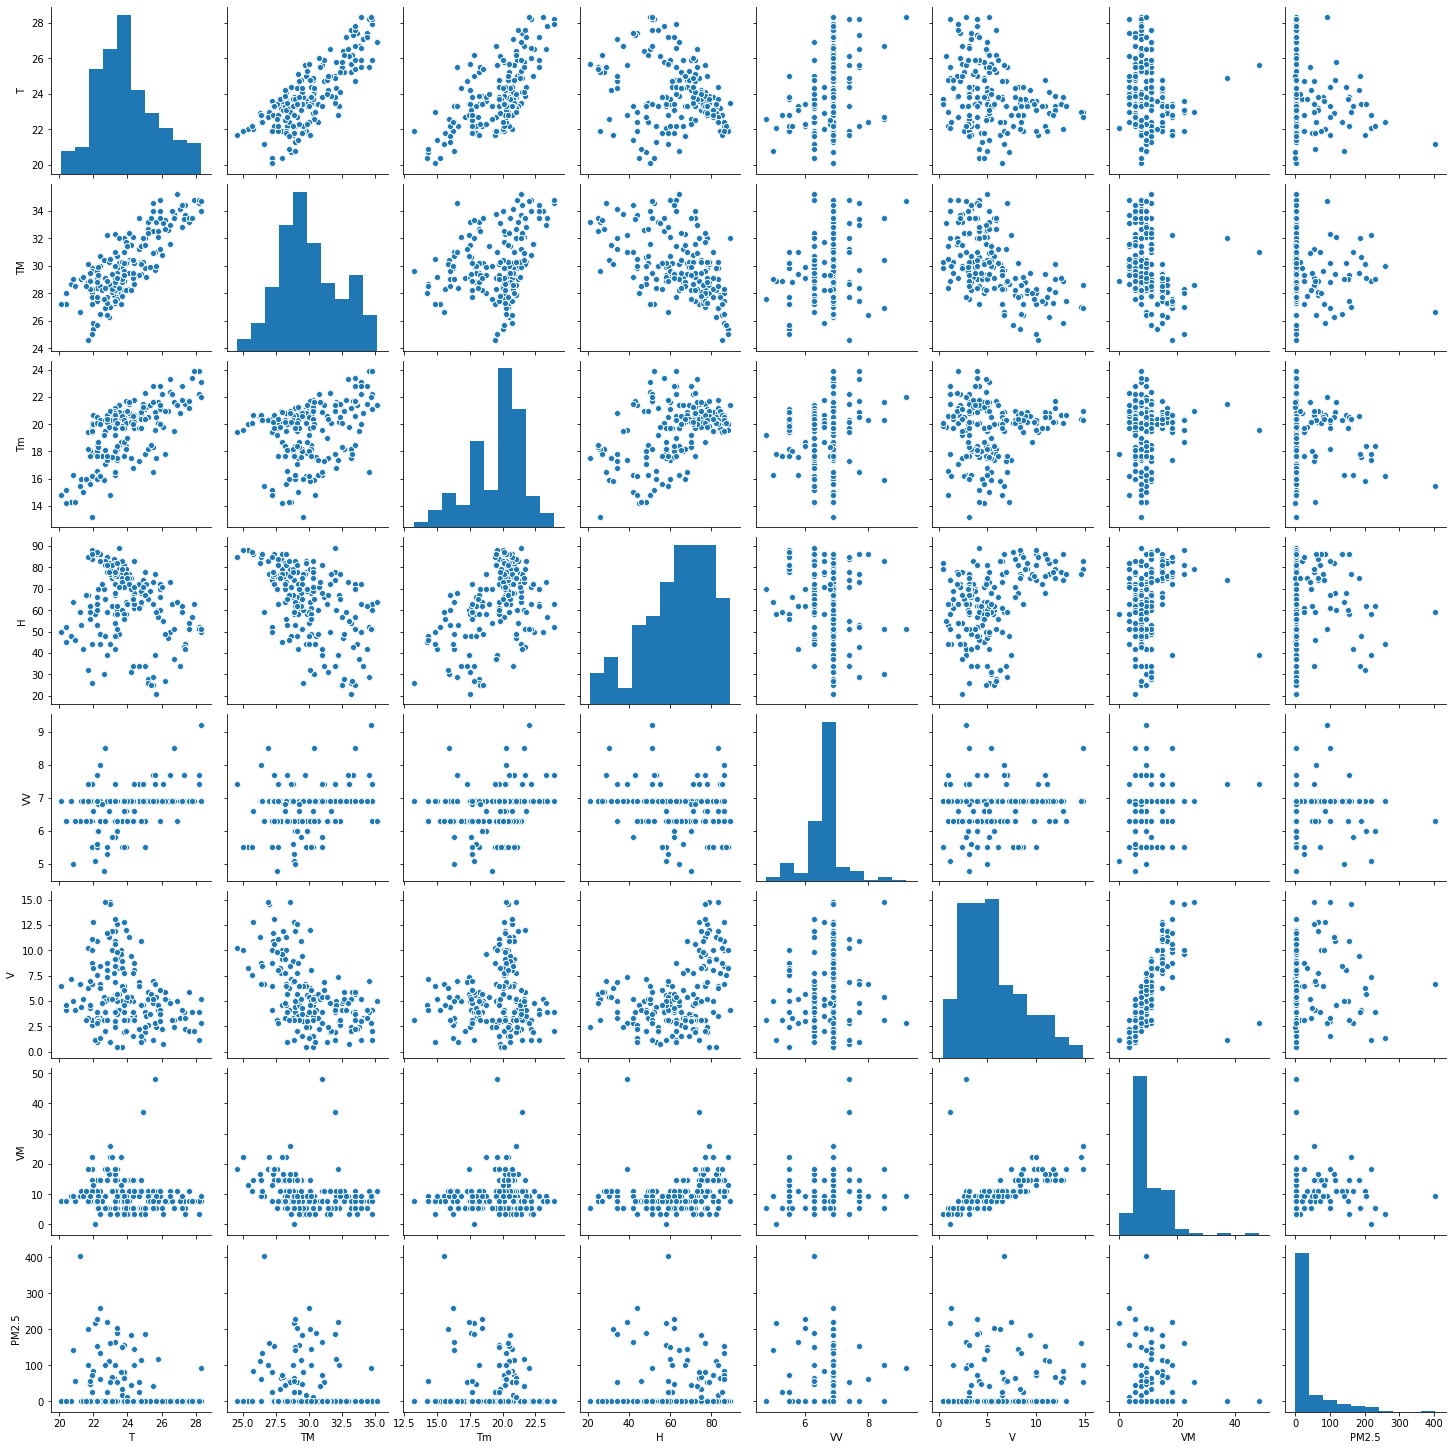

In [10]:
sns.pairplot(df)

We can clearly see that there is no linear relationship between our Independent variables and Dependent variable (PM2.5)
So LinearRegression model will not work well for this dataset

# Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

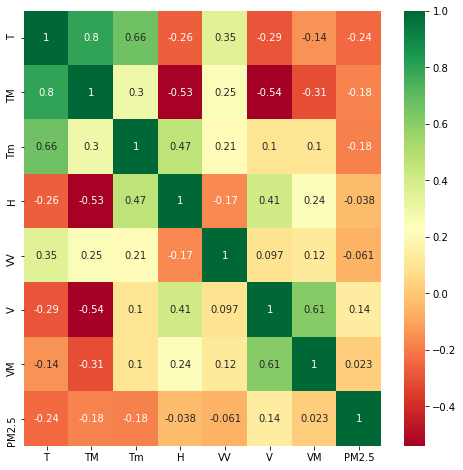

In [11]:
#plotting correlation heat map
plt.figure(figsize=(8,8))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

There is less correlation between the feature.

# Separating X and Y:

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# XGBRegressor 
### Hyper parameter tuning using RandomizedSearchCv

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [17]:
regressor = xgb.XGBRegressor()

In [18]:
# Number of trees in xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

param_distributions = {
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'subsample':subsample,
    'min_child_weight':min_child_weight
}

In [19]:
random = RandomizedSearchCV(regressor,param_distributions,cv =5)

In [20]:
random.fit(X_train,y_train)

[19:45:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]})

In [21]:
random.best_params_

{'subsample': 0.6,
 'n_estimators': 900,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.6'}

In [22]:
random.best_score_

0.9999999999825244

#### Using the above hyperparameters 

In [23]:
model = xgb.XGBRegressor(n_estimators= 1200,subsample = 0.8,min_child_weight= 3,learning_rate= '0.05',max_depth= 10)
model.fit(X_train,y_train)

[19:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate='0.05', max_depth=10, min_child_weight=3,
             n_estimators=1200, subsample=0.8)

# Model Evaluation

In [25]:
#predicted values
y_pred=model.predict(X_test)

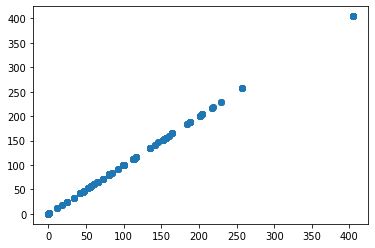

In [26]:
plt.scatter(y_test,y_pred)

# Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.000221573100706104
MSE: 9.311220218037102e-08
RMSE: 0.00030514292090817215


In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.999999999978882

From this regression metrics and r2_score we can see that model is  performing good for XGBoostRegressor model

In [31]:
import pickle 
# open a file, where you ant to store the data
file = open('xGB_regressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)